# **DECISION TREES**

Decision Trees (DTs) are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features. A tree can be seen as a piecewise constant approximation.



---



In this Notebook we are going to see how this algorithm works with a simple example, using the Python library "scikit-learn", especifically the ["Tree" module](https://scikit-learn.org/stable/modules/tree.html). 

First, we are going to import some libraries and functions that we will use:


*   **Numpy**, that allows us to work with arrays
*   The **"Scikit-learn"** library that provides a group of functions related to Decision Trees and dataset splitting
*   **Graphviz**, that will allow us to plot the Decision Trees
* **io**, that allows us to navigate files
*  **Pandas**, that allows us to work with dataframes

In [1]:
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
import graphviz 
import io
import pandas as pd
import matplotlib.pyplot as plt #personally inserted


## **DATA DEFINITION**

In this activity we have a dataset of medical diagnoses based on having some of these five different symptoms, in order:


*   Temperature
*   Sore throat
*   Cough
*   Headache
*   Muscle pain

The possible diagnoses are:


*   Covid
*   Flu
*   Cold
*   Other

Here we have a set of parameters ***(XTrain)*** consisting of five different values (one for each symptom presented previously) where 0 is not having the symptom and 1 is having it. For each set of parameters we have a diagnose ***(yTrain)*** of the previously listed diagnoses. Here we can see a table containing this data:

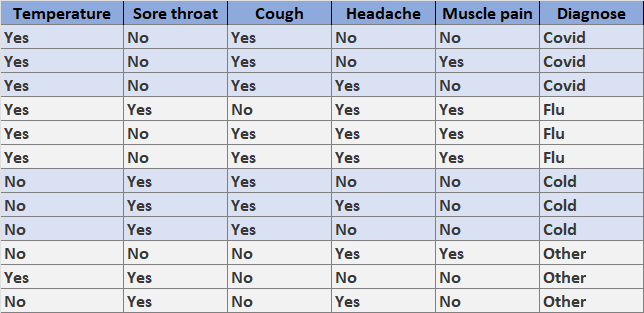




In [2]:
# Parameters of training data
XTrain = np.array([[1, 0, 1, 0, 0], [1, 0, 1, 0, 1], [1, 0, 1, 1, 0],\
                   [1, 1, 0, 1, 1], [1, 0, 1, 1, 1], [1, 0, 1, 1, 1],\
                   [0, 1, 1, 0, 0], [0, 1, 1, 1, 0], [0, 1, 1, 0, 0],\
                   [0, 0, 0, 1, 1], [1, 1, 0, 0, 0], [0, 1, 0, 1, 0]])

# Ground truth of training data
yTrain = np.array(["Covid", "Covid", "Covid", "Flu", "Flu", "Flu", "Cold", "Cold", "Cold", "Other", "Other", "Other"])

To start, we have an example of how to create a basic DT using the ["Tree" module](https://scikit-learn.org/stable/modules/tree.html), specifically the **"DecisionTreeClassifier"**. Next, the DT is exported as text and displayed. ***Try changing the criterion to get the information gain (entropy).***

In [3]:
# Fit the classifier
# TO DO: Change the criterion to information gain
clf = tree.DecisionTreeClassifier(criterion = "entropy") #_________TO DO__________
clf = clf.fit(XTrain, yTrain)

# Export and print the DT
r = tree.export_text(clf, feature_names=["Temperature", "Sore throat", "Cough", "Headache", "Muscle pain"])
print(r)

|--- Temperature <= 0.50
|   |--- Cough <= 0.50
|   |   |--- class: Other
|   |--- Cough >  0.50
|   |   |--- class: Cold
|--- Temperature >  0.50
|   |--- Muscle pain <= 0.50
|   |   |--- Cough <= 0.50
|   |   |   |--- class: Other
|   |   |--- Cough >  0.50
|   |   |   |--- class: Covid
|   |--- Muscle pain >  0.50
|   |   |--- Headache <= 0.50
|   |   |   |--- class: Covid
|   |   |--- Headache >  0.50
|   |   |   |--- class: Flu



The ["Tree" module](https://scikit-learn.org/stable/modules/tree.html) allows us to plot the tree, as follows:

[Text(0.4090909090909091, 0.875, 'X[0] <= 0.5\nentropy = 2.0\nsamples = 12\nvalue = [3, 3, 3, 3]'),
 Text(0.18181818181818182, 0.625, 'X[2] <= 0.5\nentropy = 0.971\nsamples = 5\nvalue = [3, 0, 0, 2]'),
 Text(0.09090909090909091, 0.375, 'entropy = 0.0\nsamples = 2\nvalue = [0, 0, 0, 2]'),
 Text(0.2727272727272727, 0.375, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0, 0, 0]'),
 Text(0.6363636363636364, 0.625, 'X[4] <= 0.5\nentropy = 1.449\nsamples = 7\nvalue = [0, 3, 3, 1]'),
 Text(0.45454545454545453, 0.375, 'X[2] <= 0.5\nentropy = 0.918\nsamples = 3\nvalue = [0, 2, 0, 1]'),
 Text(0.36363636363636365, 0.125, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 0, 1]'),
 Text(0.5454545454545454, 0.125, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2, 0, 0]'),
 Text(0.8181818181818182, 0.375, 'X[3] <= 0.5\nentropy = 0.811\nsamples = 4\nvalue = [0, 1, 3, 0]'),
 Text(0.7272727272727273, 0.125, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1, 0, 0]'),
 Text(0.9090909090909091, 0.125, 'entropy = 0.0\nsamples = 3\n

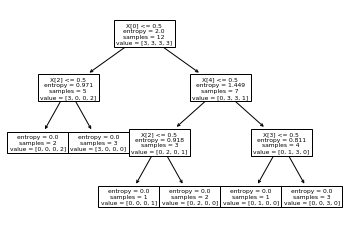

In [4]:
# Plot the decision tree
# plt.figure(figsize=(30, 30) # Resize figure
tree.plot_tree(clf)

The previous plot of the decision tree isn't very easy to understand, so we are going to use the [**"graphviz"** library](https://www.graphviz.org) to plot the DT, as it allows to plot the parameters and the class names. Also it supports a variety of aesthetic options, including coloring nodes by their class (or value for regression) and using explicit variable and class names if desired. **Search and apply the parameter that defines how to paint the nodes to indicate majority class for classification (different color for each class).**

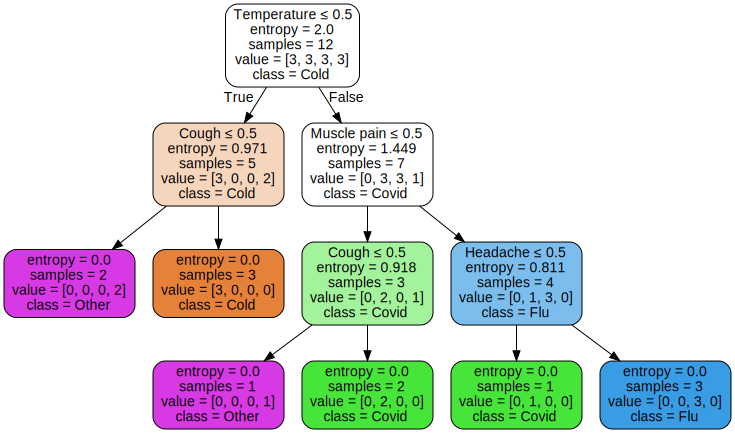

In [5]:
# Export the tree data
# TO DO: Apply the parameter that defines how to paint the nodes to indicate majority class for classification
dot_data = tree.export_graphviz(clf, out_file=None, 
                     feature_names=["Temperature", "Sore throat", "Cough", "Headache", "Muscle pain"],  
                     class_names=clf.classes_, rounded=True,  
                     special_characters=True, filled = True )  #________TO DO__________
# Create the graphviz graph
graph = graphviz.Source(dot_data)  
# Display the DT graph
graph 

Observe the decision tree generated and answer the following questions:


*   What is the most likely diagnose if the patient only has a temperature, a headache and muscle pain?
*   What is the most likely diagnose if the patient only has a temperature and coughs?
*   What is the most likely diagnose if the patient only coughs and has a sore throat?
*   What is the most likely diagnose if the patient only has a temperature? 


After you answer, use the DT classifier defined to answer these questions again and check if you were correct.

In [6]:
# TO DO: Define the parameters for each prediction
XTest = [[1, 0, 0, 1, 1], [1, 0, 1, 0, 0], [0, 1, 1, 0, 0], [1, 0, 0, 0, 0]] # ________TO DO_________

# TO DO: Predict the diagnoses
clf.predict(XTest)

array(['Flu', 'Covid', 'Cold', 'Other'], dtype='<U5')

Now try to create the same DT but using the actual temperature of each patient. ***Do you get the same DT? Are the answers to the previous questions the same?***

$\color{red}{\text{Yes. We get the same decision tree and the answers are the same with the previous tree}}$

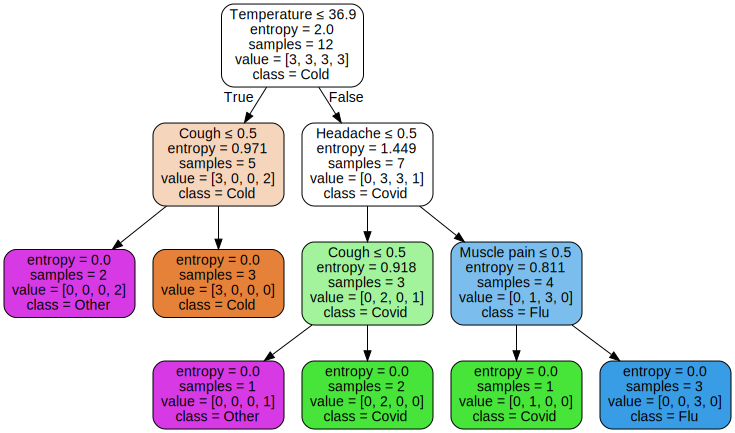

In [7]:
# Parameters of training data
XTrain2 = np.array([[38.6, 0, 1, 0, 0], [37.9, 0, 1, 0, 1], [37.5, 0, 1, 1, 0],\
                   [39.0, 1, 0, 1, 1], [37.2, 0, 1, 1, 1], [38.4, 0, 1, 1, 1],\
                   [36.1, 1, 1, 0, 0], [35.8, 1, 1, 1, 0], [36.4, 1, 1, 0, 0],\
                   [36.6, 0, 0, 1, 1], [37.3, 1, 0, 0, 0], [35.7, 1, 0, 1, 0]])

# Ground truth of training data
yTrain2 = np.array(["Covid", "Covid", "Covid", "Flu", "Flu", "Flu", "Cold", "Cold", "Cold", "Other", "Other", "Other"])

# TO DO: Create and fit the classifier
clf2 = tree.DecisionTreeClassifier(criterion = "entropy") #_________TO DO__________
clf2 = clf.fit(XTrain2, yTrain2)

# TO DO: Plot the resulting tree
dot_data2 = tree.export_graphviz(clf2, out_file=None, 
                     feature_names=["Temperature", "Sore throat", "Cough", "Headache", "Muscle pain"],  
                     class_names=clf2.classes_, rounded=True,  
                     special_characters=True, filled = True )  
graph2 = graphviz.Source(dot_data2)  
graph2

Now test your classifier with these data. ***What results do you get?***

In [8]:
# Define the parameters for each prediction
XTest = [[38.1, 0, 0, 1, 1], [37.8, 0, 1, 0, 0], [36.3, 1, 1, 0, 0], [37.9, 0, 0, 0, 0]]

# TO DO: Predict the diagnoses
clf2.predict(XTest)

array(['Flu', 'Covid', 'Cold', 'Other'], dtype='<U5')



---



Now we are going to work with a larger dataset. The dataset is a public dataset coming from Cleveland database that you can download from the subject platform in the Moodle.

It contains 14 columns (one per attribute). The attributes are related to the patient health state. They are the following:


1.	age 
2.	sex 
3.	chest pain type (4 values) 
4.	resting blood pressure 
5.	serum cholestoral in mg/dl 
6.	fasting blood sugar > 120 mg/dl
7.	resting electrocardiographic results (values 0,1,2)
8.	maximum heart rate achieved 
9.	exercise induced angina 
10.	oldpeak = ST depression induced by exercise relative to rest 
11.	the slope of the peak exercise ST segment 
12.	number of major vessels (0-3) colored by flourosopy 
13.	thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
14.	target ( 1=ill, 0=helathy)


The dataset contains the information of 303 patients.

First, run the following cell and load the "heart.csv" file from your disk.


In [9]:
# TO DO: load "heart.csv" file from disk
from google.colab import files
uploaded = files.upload()

Saving heart.csv to heart.csv


Run this cell to load the data and generate a training and testing dataset that will be later used to generate the classsifier.

In [61]:
# Sort the dataset in a Pandas Dataframe
df = pd.read_csv(io.BytesIO(uploaded['heart.csv']))

# Divide the dataset in 70% training and 30% testing
df_train, df_test = train_test_split(df, test_size=0.3)

# Extract the names of the atributes of the dataset
X_list = df_train.columns.values.tolist()
# Extract the name of the ground truth atribute of the dataset
y_list = X_list.pop()

# Extract the parameters and ground truth of the training data
XTrain3 = df_train[X_list]
yTrain3 = df_train[y_list]
# Extract the parameters and ground truth of the testing data
XTest3 = df_test[X_list]
yTest3 = df_test[y_list]

Now that we have the sorted data, create a new Decision Tree using entropy criterion for this data and answer the following questions. 

* **Which is the % of correct predictions for the training and testing data? Round the value to 2 decimals.** 

* **Which is the depth of the generated DT?**

* **How many leaf nodes does it have?**

In [63]:
from sklearn import metrics 
# TO DO: Create and fit DT classifier
clf3 = tree.DecisionTreeClassifier(criterion = "entropy") #________TO DO__________
clf3.fit(XTrain3, yTrain3)

# Check predictions for training and testing data
yTrain_Pred = clf3.predict(XTrain3)#________TO DO__________
yTest_Pred = clf3.predict(XTest3)

print(f"Training Accuracy: {round(metrics.accuracy_score(yTrain3, yTrain_Pred) * 100, 2)}%")
print(f"Testing Accuracy: {round(metrics.accuracy_score(yTest3, yTest_Pred) * 100, 2)}%")

# Check depth and number of leaf nodes of generated DT
print("Tree Depth = " + str(clf3.get_depth()))#________TO DO__________
print("Number of leaf nodes = " + str(clf3.get_n_leaves()))

Training Accuracy: 100.0%
Testing Accuracy: 72.53%
Tree Depth = 9
Number of leaf nodes = 35


Plot the DT graph (colored) and analyze it.

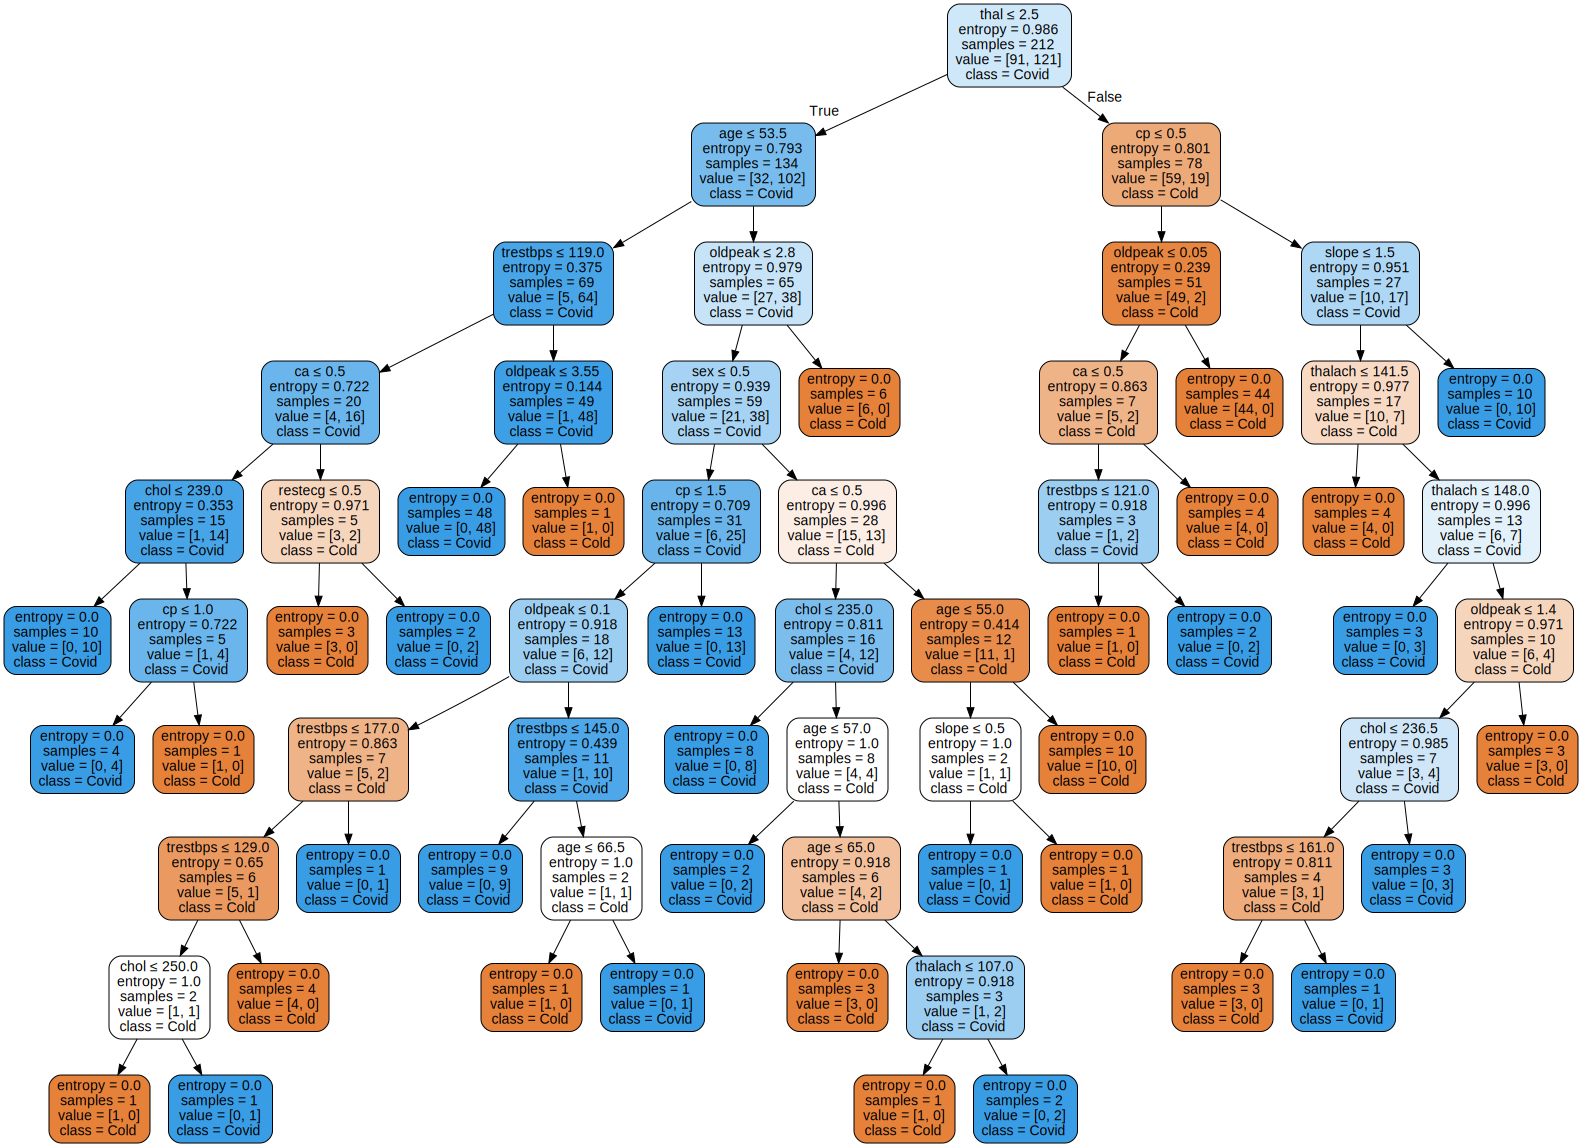

In [12]:
# TO DO: Plot the resulting tree
dot_data3 = tree.export_graphviz(clf3, out_file=None, 
                     feature_names=X_list,  
                     class_names=[str(numeric_string) for numeric_string in clf.classes_], rounded=True,  
                     special_characters=True, filled = True )  
graph3 = graphviz.Source(dot_data3)  
graph3

As we've just seen, the DT generated is quite deep and wide. This is because DT tend to overfit the data. To avoid this, we can change the maximum depth and minimum number of leaf nodes allowed. Try different values for each parameter and find the best result. **Which combination works best?**

***Hint:* You might want to use a loop to try the different combinations**

<function matplotlib.pyplot.show(*args, **kw)>

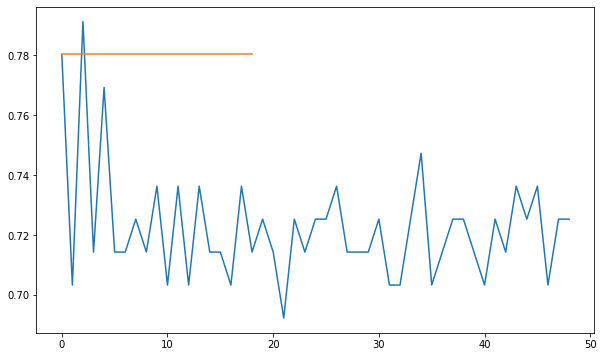

In [65]:
# TO DO: Create DT Classifiers with different maximum depths and minimum number of lead nodes allowed
import matplotlib.pyplot as plt
# maximum depth range
max_depth_range = list(range(1, 50,1))

# minimum number of samples at leaf node
min_num_leaf_nodes = list(range(1, 20))
# List to store the accuracry for each value of max_depth
accuracy1 = []
accuracy2 = []

for i in max_depth_range:
  clf4 = tree.DecisionTreeClassifier(max_depth = i , criterion = "entropy")
  clf4.fit(XTrain3, yTrain3)
  score = clf4.score(XTest3, yTest3)
  accuracy1.append(score)

for j in min_num_leaf_nodes:
  clf4 = tree.DecisionTreeClassifier(min_samples_leaf = i , criterion = "entropy")
  clf4.fit(XTrain3, yTrain3)
  score = clf4.score(XTest3, yTest3)
  accuracy2.append(score)

# print(accuracy2)
# clf4 = tree.DecisionTreeClassifier(max_depth = 1 , criterion = "entropy")
# clf4.fit(XTrain, yTrain)
# score = clf4.score(XTest, yTest)
# print(score)
# print(accuracy.index(max(accuracy)))
# plt.rcParams["figure.figsize"] = (10,6)
# plt.plot(accuracy1)
# plt.plot(accuracy2)
# plt.show

# print("hello")

Plot the best DT you found and compare it with the previous one. ***Is it easier to follow?***

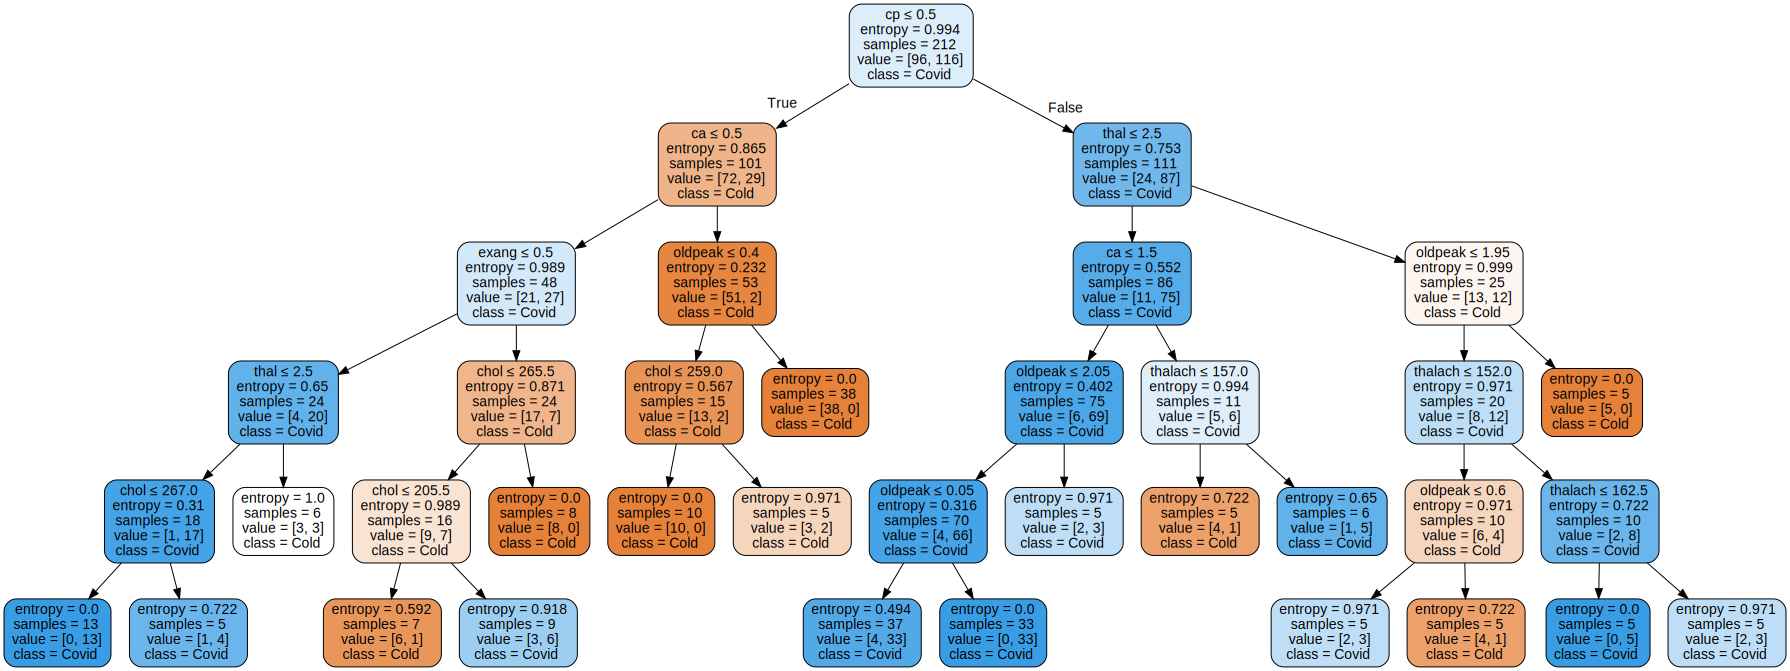

In [69]:
# TO DO: Plot the resulting tree
clf4 = tree.DecisionTreeClassifier(max_depth = 5, min_samples_leaf = 5 , criterion = "entropy")
clf4.fit(XTrain3, yTrain3)

dot_data4 = tree.export_graphviz(clf4, out_file=None, 
                     feature_names=X_list,  
                     class_names=[str(numeric_string) for numeric_string in clf.classes_], rounded=True,  
                     special_characters=True, filled = True )  
graph4 = graphviz.Source(dot_data4)  
graph4

On this lab, we've been using a split of training/test, and we have been taking decisions and changing hyperparameters (e.g. depth) based on the test performance. **Is this the correct methodology?**

$\color{red}{\text{This methodlogy is not correct. Our testing data is meant to be used to validate the performance}\\ \text{of our model on a data it has not seen before.}}$